In [7]:
import numpy as np

# Define the neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer
        self.weights_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))

        # Initialize weights and biases for the output layer
        self.weights_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_layer_input = np.dot(inputs, self.weights_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_output) + self.bias_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        output_error = targets - self.output_layer_output
        output_delta = output_error * self.sigmoid_derivative(self.output_layer_output)

        hidden_error = output_delta.dot(self.weights_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward(inputs)

            # Backward pass and weight update
            self.backward(inputs, targets, learning_rate)

            # Calculate and print the mean squared error for monitoring
            mse = np.mean((targets - predictions) ** 2)
            print(f"Epoch {epoch + 1}/{epochs}, Mean Squared Error: {mse:.4f}")

# Example usage
if __name__ == "__main__":
    # Generate some random training data
    np.random.seed(42)
    inputs = np.random.rand(1000, 5)
    targets = np.random.randint(0, 2, (1000, 1))

    # Create a neural network with 5 input nodes, 3 hidden nodes, and 1 output node
    nn = NeuralNetwork(input_size=5, hidden_size=3, output_size=1)

    # Train the neural network
    nn.train(inputs, targets, epochs=1000, learning_rate=0.01)

    # Test the trained model
    test_input = np.array([[0.1, 0.2, 0.3, 0.4, 0.5]])
    prediction = nn.forward(test_input)
    print(f"Prediction for {test_input}: {prediction}")


Epoch 1/1000, Mean Squared Error: 0.3613
Epoch 2/1000, Mean Squared Error: 0.2640
Epoch 3/1000, Mean Squared Error: 0.2522
Epoch 4/1000, Mean Squared Error: 0.2503
Epoch 5/1000, Mean Squared Error: 0.2498
Epoch 6/1000, Mean Squared Error: 0.2497
Epoch 7/1000, Mean Squared Error: 0.2496
Epoch 8/1000, Mean Squared Error: 0.2496
Epoch 9/1000, Mean Squared Error: 0.2496
Epoch 10/1000, Mean Squared Error: 0.2496
Epoch 11/1000, Mean Squared Error: 0.2496
Epoch 12/1000, Mean Squared Error: 0.2496
Epoch 13/1000, Mean Squared Error: 0.2496
Epoch 14/1000, Mean Squared Error: 0.2496
Epoch 15/1000, Mean Squared Error: 0.2496
Epoch 16/1000, Mean Squared Error: 0.2496
Epoch 17/1000, Mean Squared Error: 0.2496
Epoch 18/1000, Mean Squared Error: 0.2496
Epoch 19/1000, Mean Squared Error: 0.2496
Epoch 20/1000, Mean Squared Error: 0.2496
Epoch 21/1000, Mean Squared Error: 0.2496
Epoch 22/1000, Mean Squared Error: 0.2496
Epoch 23/1000, Mean Squared Error: 0.2496
Epoch 24/1000, Mean Squared Error: 0.2496
E

In [9]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def feedforward(self, inputs):
        activations = inputs
        for w, b in zip(self.weights, self.biases):
            activations = self.sigmoid(np.dot(w, activations) + b)
        return activations

    def train(self, training_data, epochs, learning_rate):
        for epoch in range(epochs):
            for x, y in training_data:
                self.update_weights_biases(x, y, learning_rate)
            print(f"Epoch {epoch + 1}/{epochs} completed")

    def update_weights_biases(self, x, y, learning_rate):
        # Forward pass
        activations = [x]
        zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            activations.append(self.sigmoid(z))

        # Backward pass
        delta = self.mean_squared_error_derivative(activations[-1], y) * self.sigmoid_derivative(zs[-1])
        nabla_b = [delta]
        nabla_w = [np.dot(delta, activations[-2].T)]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_derivative(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            nabla_b.insert(0, delta)
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].T))

        # Update weights and biases
        self.weights = [w - (learning_rate / len(x)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (learning_rate / len(x)) * nb.sum(axis=1, keepdims=True) for b, nb in zip(self.biases, nabla_b)]

    def mean_squared_error_derivative(self, output_activations, y):
        return output_activations - y


# Example usage:
if __name__ == "__main__":
    # Define the neural network architecture (number of neurons in each layer)
    input_size = 2  # Number of neurons in the input layer
    hidden_layer_size = 3  # Number of neurons in the hidden layer
    output_size = 1  # Number of neurons in the output layer
    layer_sizes = [input_size, hidden_layer_size, output_size]

    # Create a neural network
    neural_network = NeuralNetwork(layer_sizes)

    # Define training data (x: input, y: target output)
    training_data = [(np.array([[0], [0]]), np.array([[0]])),
                     (np.array([[0], [1]]), np.array([[1]])),
                     (np.array([[1], [0]]), np.array([[1]])),
                     (np.array([[1], [1]]), np.array([[0]]))]

    # Train the neural network
    neural_network.train(training_data, epochs=10000, learning_rate=0.1)

    # Test the trained neural network
    for x, y in training_data:
        prediction = neural_network.feedforward(x)
        print(f"Input: {x}, Target Output: {y}, Predicted Output: {prediction}")


Streaming output truncated to the last 5000 lines.
Epoch 5009/10000 completed
Epoch 5010/10000 completed
Epoch 5011/10000 completed
Epoch 5012/10000 completed
Epoch 5013/10000 completed
Epoch 5014/10000 completed
Epoch 5015/10000 completed
Epoch 5016/10000 completed
Epoch 5017/10000 completed
Epoch 5018/10000 completed
Epoch 5019/10000 completed
Epoch 5020/10000 completed
Epoch 5021/10000 completed
Epoch 5022/10000 completed
Epoch 5023/10000 completed
Epoch 5024/10000 completed
Epoch 5025/10000 completed
Epoch 5026/10000 completed
Epoch 5027/10000 completed
Epoch 5028/10000 completed
Epoch 5029/10000 completed
Epoch 5030/10000 completed
Epoch 5031/10000 completed
Epoch 5032/10000 completed
Epoch 5033/10000 completed
Epoch 5034/10000 completed
Epoch 5035/10000 completed
Epoch 5036/10000 completed
Epoch 5037/10000 completed
Epoch 5038/10000 completed
Epoch 5039/10000 completed
Epoch 5040/10000 completed
Epoch 5041/10000 completed
Epoch 5042/10000 completed
Epoch 5043/10000 completed
Epoc

In [10]:
!pip install matplotlib networkx

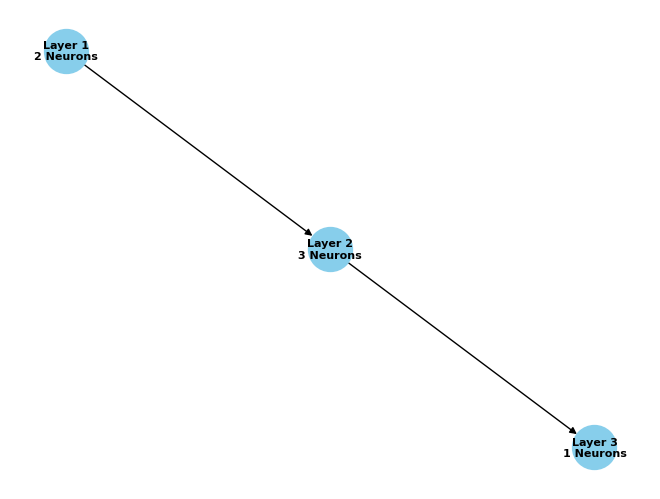

Streaming output truncated to the last 5000 lines.
Epoch 5009/10000 completed
Epoch 5010/10000 completed
Epoch 5011/10000 completed
Epoch 5012/10000 completed
Epoch 5013/10000 completed
Epoch 5014/10000 completed
Epoch 5015/10000 completed
Epoch 5016/10000 completed
Epoch 5017/10000 completed
Epoch 5018/10000 completed
Epoch 5019/10000 completed
Epoch 5020/10000 completed
Epoch 5021/10000 completed
Epoch 5022/10000 completed
Epoch 5023/10000 completed
Epoch 5024/10000 completed
Epoch 5025/10000 completed
Epoch 5026/10000 completed
Epoch 5027/10000 completed
Epoch 5028/10000 completed
Epoch 5029/10000 completed
Epoch 5030/10000 completed
Epoch 5031/10000 completed
Epoch 5032/10000 completed
Epoch 5033/10000 completed
Epoch 5034/10000 completed
Epoch 5035/10000 completed
Epoch 5036/10000 completed
Epoch 5037/10000 completed
Epoch 5038/10000 completed
Epoch 5039/10000 completed
Epoch 5040/10000 completed
Epoch 5041/10000 completed
Epoch 5042/10000 completed
Epoch 5043/10000 completed
Epoc

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def feedforward(self, inputs):
        activations = inputs
        for w, b in zip(self.weights, self.biases):
            activations = self.sigmoid(np.dot(w, activations) + b)
        return activations

    def train(self, training_data, epochs, learning_rate):
        for epoch in range(epochs):
            for x, y in training_data:
                self.update_weights_biases(x, y, learning_rate)
            print(f"Epoch {epoch + 1}/{epochs} completed")

    def update_weights_biases(self, x, y, learning_rate):
        # Forward pass
        activations = [x]
        zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            activations.append(self.sigmoid(z))

        # Backward pass
        delta = self.mean_squared_error_derivative(activations[-1], y) * self.sigmoid_derivative(zs[-1])
        nabla_b = [delta]
        nabla_w = [np.dot(delta, activations[-2].T)]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_derivative(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            nabla_b.insert(0, delta)
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].T))

        # Update weights and biases
        self.weights = [w - (learning_rate / len(x)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (learning_rate / len(x)) * nb.sum(axis=1, keepdims=True) for b, nb in zip(self.biases, nabla_b)]

    def mean_squared_error_derivative(self, output_activations, y):
        return output_activations - y

    def visualize(self):
        G = nx.DiGraph()

        # Add nodes
        for i, size in enumerate(self.layer_sizes):
            G.add_node(f"Layer {i + 1}\n{size} Neurons", pos=(i, -i))

        # Add edges
        for i in range(len(self.layer_sizes) - 1):
            G.add_edges_from([(f"Layer {i + 1}\n{self.layer_sizes[i]} Neurons", f"Layer {i + 2}\n{self.layer_sizes[i + 1]} Neurons")])

        # Draw the neural network
        pos = nx.get_node_attributes(G, 'pos')
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=8, font_color='black')
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Define the neural network architecture (number of neurons in each layer)
    input_size = 2  # Number of neurons in the input layer
    hidden_layer_size = 3  # Number of neurons in the hidden layer
    output_size = 1  # Number of neurons in the output layer
    layer_sizes = [input_size, hidden_layer_size, output_size]

    # Create a neural network
    neural_network = NeuralNetwork(layer_sizes)

    # Visualize the neural network
    neural_network.visualize()

    # Define training data (x: input, y: target output)
    training_data = [(np.array([[0], [0]]), np.array([[0]])),
                     (np.array([[0], [1]]), np.array([[1]])),
                     (np.array([[1], [0]]), np.array([[1]])),
                     (np.array([[1], [1]]), np.array([[0]]))]

    # Train the neural network
    neural_network.train(training_data, epochs=10000, learning_rate=0.1)

    # Test the trained neural network
    for x, y in training_data:
        prediction = neural_network.feedforward(x)
        print(f"Input: {x}, Target Output: {y}, Predicted Output: {prediction}")


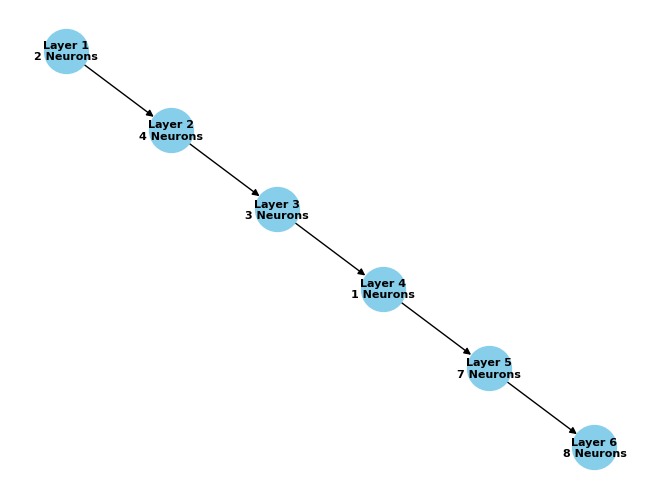

Epoch 1/100 completed
Epoch 2/100 completed
Epoch 3/100 completed
Epoch 4/100 completed
Epoch 5/100 completed
Epoch 6/100 completed
Epoch 7/100 completed
Epoch 8/100 completed
Epoch 9/100 completed
Epoch 10/100 completed
Epoch 11/100 completed
Epoch 12/100 completed
Epoch 13/100 completed
Epoch 14/100 completed
Epoch 15/100 completed
Epoch 16/100 completed
Epoch 17/100 completed
Epoch 18/100 completed
Epoch 19/100 completed
Epoch 20/100 completed
Epoch 21/100 completed
Epoch 22/100 completed
Epoch 23/100 completed
Epoch 24/100 completed
Epoch 25/100 completed
Epoch 26/100 completed
Epoch 27/100 completed
Epoch 28/100 completed
Epoch 29/100 completed
Epoch 30/100 completed
Epoch 31/100 completed
Epoch 32/100 completed
Epoch 33/100 completed
Epoch 34/100 completed
Epoch 35/100 completed
Epoch 36/100 completed
Epoch 37/100 completed
Epoch 38/100 completed
Epoch 39/100 completed
Epoch 40/100 completed
Epoch 41/100 completed
Epoch 42/100 completed
Epoch 43/100 completed
Epoch 44/100 complet

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def feedforward(self, inputs):
        activations = inputs
        for w, b in zip(self.weights, self.biases):
            activations = self.sigmoid(np.dot(w, activations) + b)
        return activations

    def train(self, training_data, epochs, learning_rate):
        for epoch in range(epochs):
            for x, y in training_data:
                self.update_weights_biases(x, y, learning_rate)
            print(f"Epoch {epoch + 1}/{epochs} completed")

    def update_weights_biases(self, x, y, learning_rate):
         # Forward pass
        activations = [x]
        zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            activations.append(self.sigmoid(z))

        # Backward pass
        delta = self.mean_squared_error_derivative(activations[-1], y) * self.sigmoid_derivative(zs[-1])
        nabla_b = [delta]
        nabla_w = [np.dot(delta, activations[-2].T)]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_derivative(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            nabla_b.insert(0, delta)
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].T))

        # Update weights and biases
        self.weights = [w - (learning_rate / len(x)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (learning_rate / len(x)) * nb.sum(axis=1, keepdims=True) for b, nb in zip(self.biases, nabla_b)]


    def mean_squared_error_derivative(self, output_activations, y):
        return output_activations - y

    def visualize(self):
        G = nx.DiGraph()

        # Add nodes
        for i, size in enumerate(self.layer_sizes):
            G.add_node(f"Layer {i + 1}\n{size} Neurons", pos=(i, -i))

        # Add edges
        for i in range(len(self.layer_sizes) - 1):
            for j in range(self.layer_sizes[i]):
                for k in range(self.layer_sizes[i + 1]):
                    G.add_edge(f"Layer {i + 1}\n{self.layer_sizes[i]} Neurons", f"Layer {i + 2}\n{self.layer_sizes[i + 1]} Neurons")

        # Draw the neural network
        pos = nx.get_node_attributes(G, 'pos')
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=8, font_color='black')
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Define the neural network architecture (number of neurons in each layer)
    layer_sizes = [2, 4, 3, 1,7,8]  # Example with 4 layers

    # Create a neural network
    neural_network = NeuralNetwork(layer_sizes)

    # Visualize the neural network
    neural_network.visualize()

    # Define training data (x: input, y: target output)
    training_data = [(np.array([[0], [0]]), np.array([[0]])),
                     (np.array([[0], [1]]), np.array([[1]])),
                     (np.array([[1], [0]]), np.array([[1]])),
                     (np.array([[1], [1]]), np.array([[0]]))]

    # Train the neural network
    neural_network.train(training_data, epochs=100, learning_rate=0.1)

    # Test the trained neural network
    for x, y in training_data:
        prediction = neural_network.feedforward(x)
        print(f"Input: {x}, Target Output: {y}, Predicted Output: {prediction}")


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def feedforward(self, inputs):
        activations = inputs
        for w, b in zip(self.weights, self.biases):
            activations = self.sigmoid(np.dot(w, activations) + b)
        return activations

    def train(self, training_data, epochs, learning_rate):
        for epoch in range(epochs):
            for x, y in training_data:
                self.update_weights_biases(x, y, learning_rate)
            print(f"Epoch {epoch + 1}/{epochs} completed")

    def update_weights_biases(self, x, y, learning_rate):
          # Forward pass
        activations = [x]
        zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            activations.append(self.sigmoid(z))

        # Backward pass
        delta = self.mean_squared_error_derivative(activations[-1], y) * self.sigmoid_derivative(zs[-1])
        nabla_b = [delta]
        nabla_w = [np.dot(delta, activations[-2].T)]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_derivative(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            nabla_b.insert(0, delta)
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].T))

        # Update weights and biases
        self.weights = [w - (learning_rate / len(x)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (learning_rate / len(x)) * nb.sum(axis=1, keepdims=True) for b, nb in zip(self.biases, nabla_b)]


    def mean_squared_error_derivative(self, output_activations, y):
        return output_activations - y

    def visualize(self):
        G = nx.DiGraph()

        # Add nodes with weights and biases
        for i, (size, bias) in enumerate(zip(self.layer_sizes, self.biases)):
            layer_name = f"Layer {i + 1}\n{size} Neurons\nBias: {bias[0][0]:.2f}"
            G.add_node(layer_name, pos=(i, -i))

        # Add edges with weights
        for i in range(len(self.layer_sizes) - 1):
            for j in range(self.layer_sizes[i]):
                for k in range(self.layer_sizes[i + 1]):
                    weight = self.weights[i][k][j]
                    G.add_edge(f"Layer {i + 1}\n{self.layer_sizes[i]} Neurons\nBias: {self.biases[i][j][0]:.2f}",
                               f"Layer {i + 2}\n{self.layer_sizes[i + 1]} Neurons\nBias: {self.biases[i + 1][k][0]:.2f}",
                               label=f"Weight: {weight:.2f}")

        # Draw the neural network
        pos = nx.get_node_attributes(G, 'pos')
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=8, font_color='black')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Define the neural network architecture (number of neurons in each layer)
    layer_sizes = [2, 4, 3, 1]  # Example with 4 layers

    # Create a neural network
    neural_network = NeuralNetwork(layer_sizes)

    # Visualize the neural network
    neural_network.visualize()

    # Define training data (x: input, y: target output)
    training_data = [(np.array([[0], [0]]), np.array([[0]])),
                     (np.array([[0], [1]]), np.array([[1]])),
                     (np.array([[1], [0]]), np.array([[1]])),
                     (np.array([[1], [1]]), np.array([[0]]))]

    # Train the neural network
    neural_network.train(training_data, epochs=10000, learning_rate=0.1)

    # Test the trained neural network
    for x, y in training_data:
        prediction = neural_network.feedforward(x)
        print(f"Input: {x}, Target Output: {y}, Predicted Output: {prediction}")


IndexError: ignored